<font size=6><b> 감귤 착과량 예측 AI 경진대회
* ref: https://dacon.io/competitions/official/236038/overview/description

* ID : 과수나무 고유 ID
* 착과량(int) : 실제 감귤 착과량 (Target)
* 나무 생육 상태 Features (5개)
    * 수고(m), 수관폭1(min), 수관폭2(max), 수관폭평균(수관폭1과 수관폭2의 평균)
    * 데이터 기입은 cm 단위
* 새순 Features (89개)
    * 2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 새순 데이터
* 엽록소 Features (89개)
    * 2022년 09월 01일 ~ 2022년 11월 28일에 일별 측정된 엽록소 데이터

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

sns.set() 
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'  # 한글 처리
plt.rcParams['axes.unicode_minus'] = False  # -, $ 등등에 표현 특수기호로 버리지 말고 다 써줘라.

In [3]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
train.head()

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093


In [7]:
train.columns

Index(['착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균', '2022-09-01 새순',
       '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순', '2022-09-05 새순',
       ...
       '2022-11-19 엽록소', '2022-11-20 엽록소', '2022-11-21 엽록소', '2022-11-22 엽록소',
       '2022-11-23 엽록소', '2022-11-24 엽록소', '2022-11-25 엽록소', '2022-11-26 엽록소',
       '2022-11-27 엽록소', '2022-11-28 엽록소'],
      dtype='object', length=183)

In [9]:
train[['착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균', '2022-09-01 새순', '2022-09-01 엽록소']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   착과량(int)        2207 non-null   int64  
 1   수고(m)           2207 non-null   float64
 2   수관폭1(min)       2207 non-null   float64
 3   수관폭2(max)       2207 non-null   float64
 4   수관폭평균           2207 non-null   float64
 5   2022-09-01 새순   2207 non-null   float64
 6   2022-09-01 엽록소  2207 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 120.8 KB


# EDA

## Drop ID

In [5]:
train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

## 수고(m)

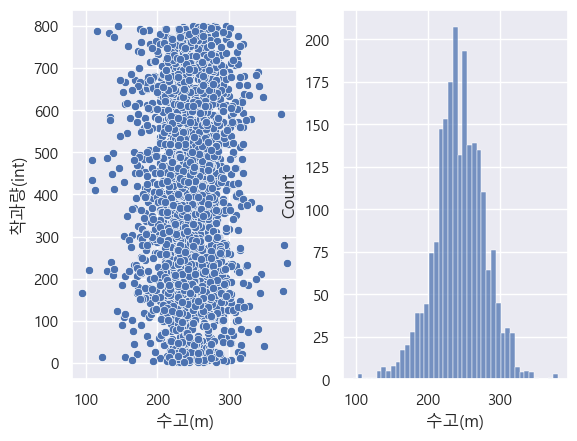

In [32]:
plt.subplot(1,2,1)
sns.scatterplot(train, x = '수고(m)', y='착과량(int)')
plt.subplot(1,2,2)
sns.histplot(train, x = '수고(m)')
plt.show()

## 수관폭

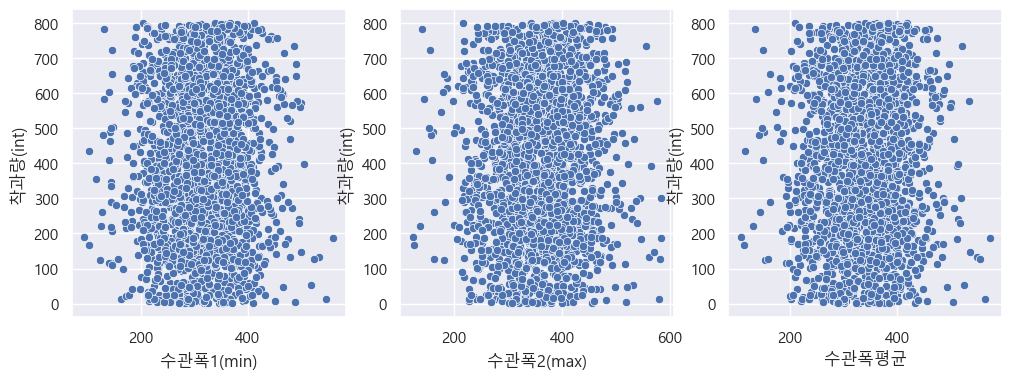

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.scatterplot(train, x = '수관폭1(min)', y='착과량(int)', ax=axes[0])
sns.scatterplot(train, x = '수관폭2(max)', y='착과량(int)', ax=axes[1])
sns.scatterplot(train, x = '수관폭평균', y='착과량(int)', ax=axes[2])
plt.show()

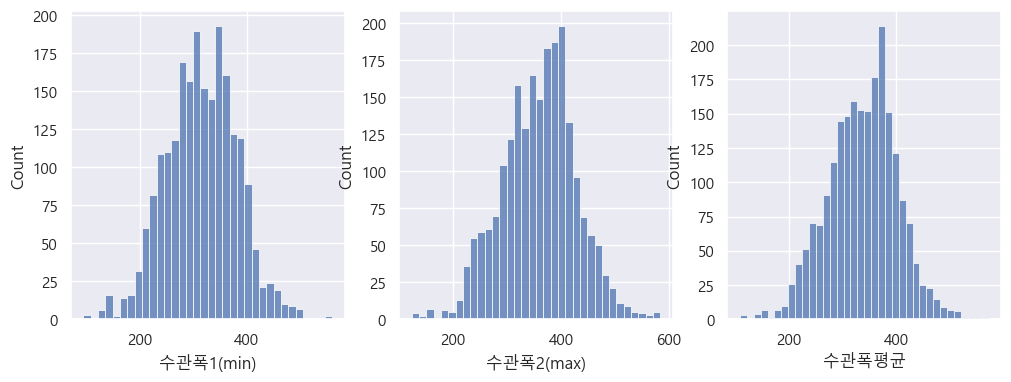

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(train, x = '수관폭1(min)', ax=axes[0])
sns.histplot(train, x = '수관폭2(max)', ax=axes[1])
sns.histplot(train, x = '수관폭평균', ax=axes[2])
plt.show()

## 새순 

In [23]:
check_columns = train.filter(regex="새순").columns
train["새순mean"]   = train[check_columns].mean(axis=1)
train["새순std"]    = train[check_columns].std(axis=1)
train["새순diff"] = train["2022-11-28 새순"] - train["2022-09-01 새순"]
train["새순min"]    = train[check_columns].min(axis=1)
train["새순max"]    = train[check_columns].max(axis=1)

check_columns = test.filter(regex="새순").columns
test["새순mean"]   = test[check_columns].mean(axis=1)
test["새순std"]    = test[check_columns].std(axis=1)
test["새순diff"] = test["2022-11-28 새순"] - test["2022-09-01 새순"]
test["새순min"]    = test[check_columns].min(axis=1)
test["새순max"]    = test[check_columns].max(axis=1)

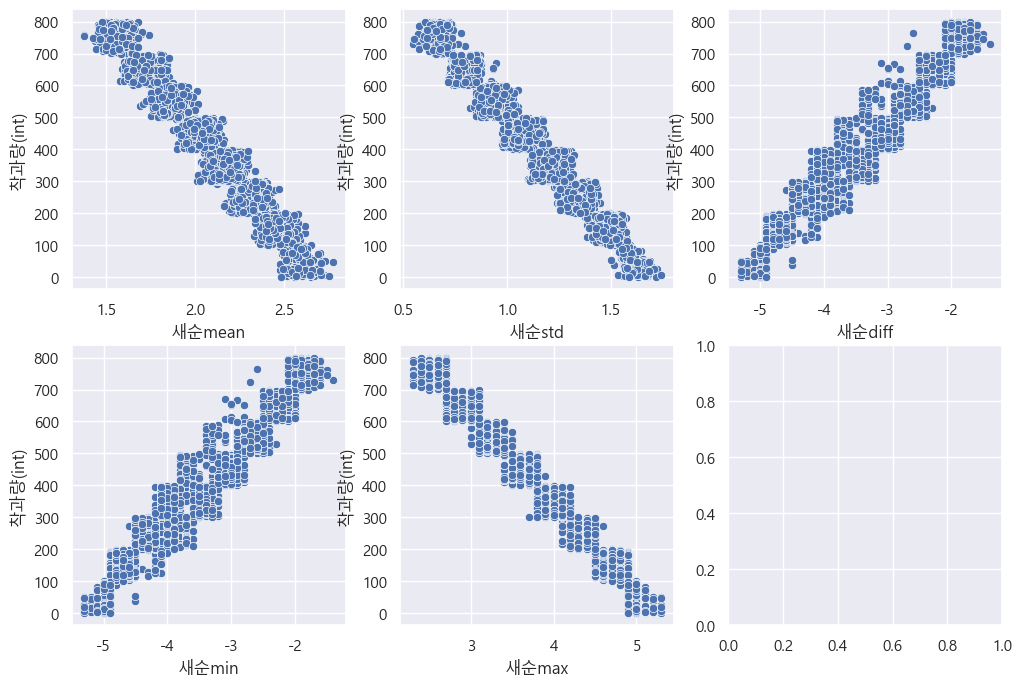

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
sns.scatterplot(train, x = '새순mean', y='착과량(int)', ax=axes[0][0])
sns.scatterplot(train, x = '새순std', y='착과량(int)', ax=axes[0][1])
sns.scatterplot(train, x = '새순diff', y='착과량(int)', ax=axes[0][2])
sns.scatterplot(train, x = '새순min', y='착과량(int)', ax=axes[1][0])
sns.scatterplot(train, x = '새순max', y='착과량(int)', ax=axes[1][1])
plt.show()

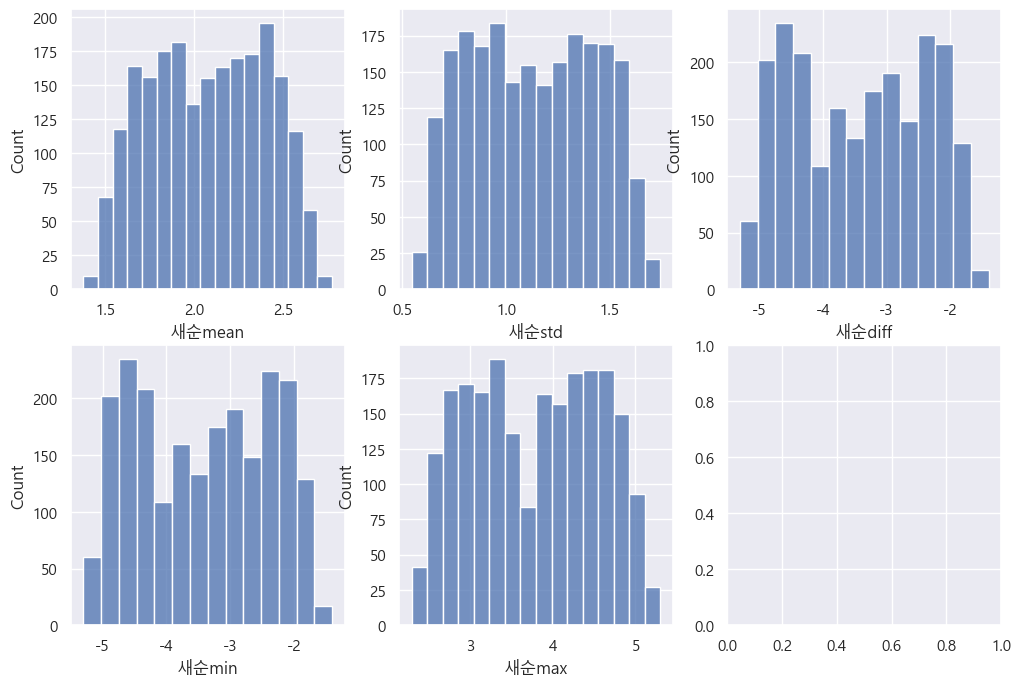

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
sns.histplot(train, x = '새순mean', ax=axes[0][0])
sns.histplot(train, x = '새순std', ax=axes[0][1])
sns.histplot(train, x = '새순diff', ax=axes[0][2])
sns.histplot(train, x = '새순min', ax=axes[1][0])
sns.histplot(train, x = '새순max', ax=axes[1][1])
plt.show()

## 염록소

In [28]:
check_columns = train.filter(regex="엽록소").columns
train["엽록소mean"]   = train[check_columns].mean(axis=1)
train["엽록소std"]    = train[check_columns].std(axis=1)
train["엽록소diff"] = train["2022-11-28 엽록소"] - train["2022-09-01 엽록소"]
train["엽록소min"]    = train[check_columns].min(axis=1)
train["엽록소max"]    = train[check_columns].max(axis=1)

check_columns = test.filter(regex="엽록소").columns
test["엽록소mean"]   = test[check_columns].mean(axis=1)
test["엽록소std"]    = test[check_columns].std(axis=1)
test["엽록소diff"] = test["2022-11-28 엽록소"] - test["2022-09-01 엽록소"]
test["엽록소min"]    = test[check_columns].min(axis=1)
test["엽록소max"]    = test[check_columns].max(axis=1)

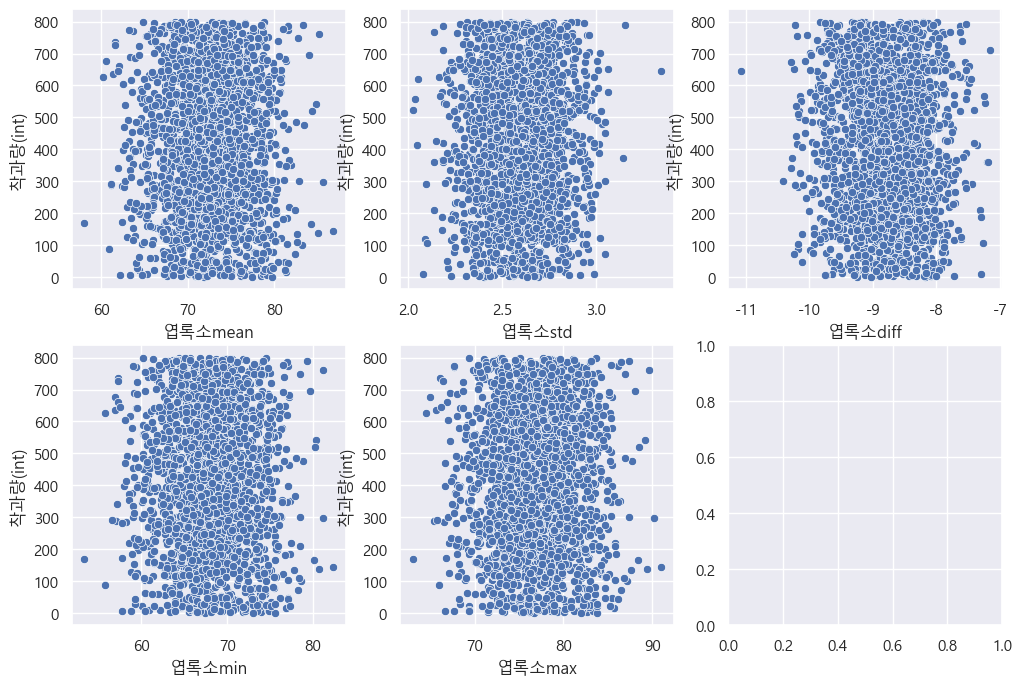

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
sns.scatterplot(train, x = '엽록소mean', y='착과량(int)', ax=axes[0][0])
sns.scatterplot(train, x = '엽록소std', y='착과량(int)', ax=axes[0][1])
sns.scatterplot(train, x = '엽록소diff', y='착과량(int)', ax=axes[0][2])
sns.scatterplot(train, x = '엽록소min', y='착과량(int)', ax=axes[1][0])
sns.scatterplot(train, x = '엽록소max', y='착과량(int)', ax=axes[1][1])
plt.show()

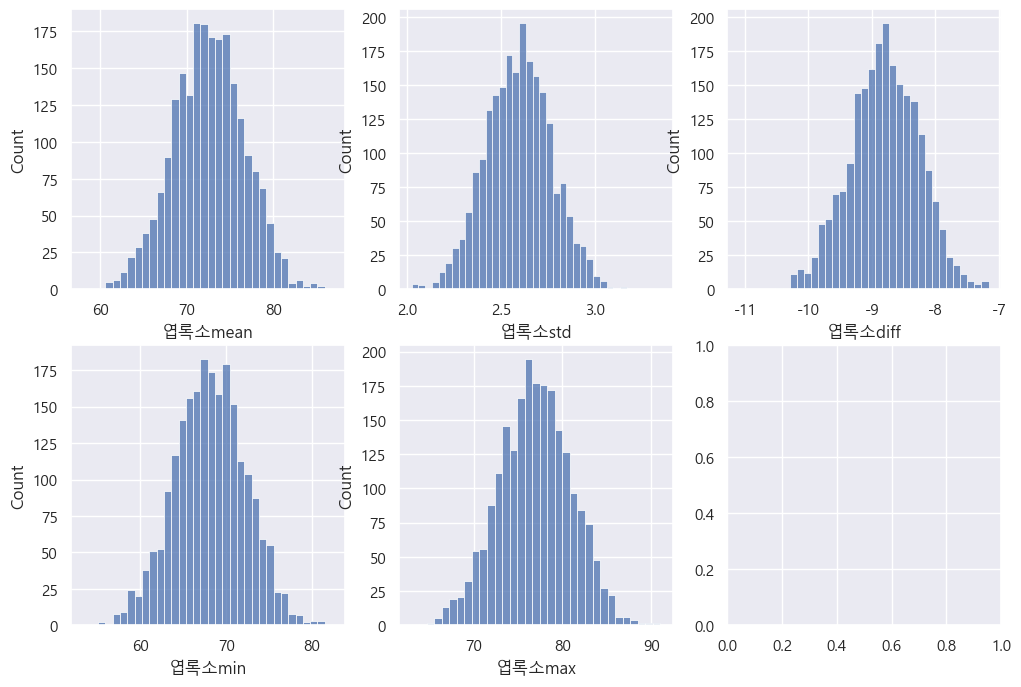

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
sns.histplot(train, x = '엽록소mean', ax=axes[0][0])
sns.histplot(train, x = '엽록소std', ax=axes[0][1])
sns.histplot(train, x = '엽록소diff', ax=axes[0][2])
sns.histplot(train, x = '엽록소min', ax=axes[1][0])
sns.histplot(train, x = '엽록소max', ax=axes[1][1])
plt.show()

## 상관분석

In [35]:
train.columns

Index(['착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균', '2022-09-01 새순',
       '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순', '2022-09-05 새순',
       ...
       '새순mean', '새순std', '새순diff', '새순min', '새순max', '엽록소mean', '엽록소std',
       '엽록소diff', '엽록소min', '엽록소max'],
      dtype='object', length=193)

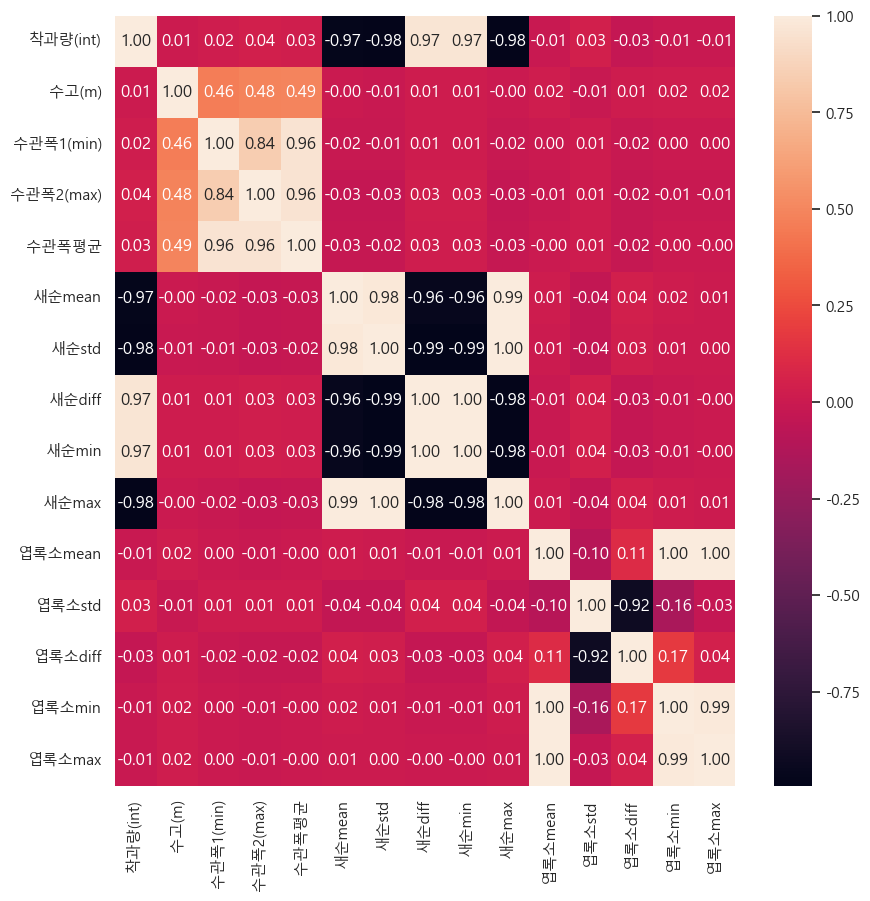

In [40]:
plt.figure(figsize=(10, 10))
sns.heatmap(train[['착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균','새순mean', '새순std', '새순diff', '새순min', '새순max', '엽록소mean', '엽록소std',
       '엽록소diff', '엽록소min', '엽록소max']].corr(), fmt='.2f', annot=True)
plt.show()

# 학습 및 평가

In [42]:
from pycaret.regression import *

col_list = ['착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균','새순mean', '새순std', '새순diff', '새순min', '새순max', '엽록소mean', '엽록소std',
       '엽록소diff', '엽록소min', '엽록소max']
train2 = train[col_list]
s = setup(train2, target = '착과량(int)', silent=True, profile=True) #, feature_selection = True)
best_model_list = compare_models(sort='MAE', n_select = 2, budget_time = 0.5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,34.6544,1792.8629,42.2828,0.9613,0.3643,0.3824,0.6600
ridge,Ridge Regression,34.8718,1817.4760,42.5706,0.9608,0.3585,0.3933,2.7920
lasso,Lasso Regression,35.1338,1846.9234,42.9123,0.9601,0.3623,0.4037,0.0050


In [43]:
col_list = ['착과량(int)', '새순mean', '새순std', '새순diff', '새순min', '새순max']
train2 = train[col_list]
s = setup(train2, target = '착과량(int)', silent=True, profile=True) #, feature_selection = True)
best_model_list = compare_models(sort='MAE', n_select = 2, budget_time = 0.5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,32.9074,1751.7927,41.7523,0.9633,0.3536,0.3434,0.0070
ridge,Ridge Regression,34.4699,1800.7581,42.4012,0.9622,0.3579,0.3894,0.0050
br,Bayesian Ridge,34.4715,1801.1649,42.4066,0.9622,0.3572,0.3888,0.0050
lar,Least Angle Regression,34.4743,1801.4269,42.4098,0.9622,0.3570,0.3887,0.0060
lr,Linear Regression,34.4744,1801.4291,42.4098,0.9622,0.3570,0.3887,0.0050
huber,Huber Regressor,34.4947,1801.3140,42.4080,0.9622,0.3562,0.3875,0.0090
lasso,Lasso Regression,34.6118,1814.7005,42.5674,0.9620,0.3638,0.3936,0.0050
omp,Orthogonal Matching Pursuit,34.7614,1827.9033,42.7277,0.9617,0.3596,0.3866,0.0050
rf,Random Forest Regressor,34.8893,2025.6435,44.8870,0.9576,0.3749,0.3475,0.1310
dt,Decision Tree Regressor,41.4721,2932.3716,54.0248,0.9385,0.4455,0.3580,0.0080


In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold

col_list = ['새순mean', '새순std', '새순diff', '새순min', '새순max']

trainX = train[col_list]
trainy = train['착과량(int)']
trainy = np.log1p(trainy)

testX = test[col_list]

model = Ridge(random_state=11)

# train data score
kf = KFold(n_splits=5, shuffle=True, random_state=11)
score_list = cross_val_score(model, trainX, trainy, scoring='neg_mean_absolute_error', cv=kf)
print(f'error {-np.mean(score_list)}')

model.fit(trainX, trainy)
pred = model.predict(testX)
pred = np.expm1(pred)

error 0.3033488897426909


In [49]:
from sklearn.neighbors import KNeighborsRegressor

col_list = ['새순mean', '새순std', '새순diff', '새순min', '새순max']

trainX = train[col_list]
trainy = train['착과량(int)']
trainy = np.log1p(trainy)

testX = test[col_list]

model = KNeighborsRegressor()

# train data score
kf = KFold(n_splits=5, shuffle=True, random_state=11)
score_list = cross_val_score(model, trainX, trainy, scoring='neg_mean_absolute_error', cv=kf)
print(f'error {-np.mean(score_list)}')

model.fit(trainX, trainy)
pred = model.predict(testX)
pred = np.expm1(pred)

error 0.16093226862717264


In [52]:
from xgboost import XGBRFRegressor

col_list = ['새순mean', '새순std', '새순diff', '새순min', '새순max']

trainX = train[col_list]
trainy = train['착과량(int)']
trainy = np.log1p(trainy)

testX = test[col_list]

model = XGBRFRegressor(random_state=11)

# train data score
kf = KFold(n_splits=5, shuffle=True, random_state=11)
score_list = cross_val_score(model, trainX, trainy, scoring='neg_mean_absolute_error', cv=kf)
print(f'error {-np.mean(score_list)}')

model.fit(trainX, trainy)
pred = model.predict(testX)
pred = np.expm1(pred)

result = pd.read_csv('./datasets/sample_submission.csv')
result['착과량(int)'] = pred
result.to_csv('./submit_v1.csv', index=False)

error 0.15367706674766407
